# Estadistica Aplicada
## Edwin Javier Hernandez Rodriguez
### 9na Sesion 27 feb 2023

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from lifelines import ExponentialFitter
%matplotlib inline

In [5]:
from lifelines.datasets import load_rossi
rossi = load_rossi()

In [7]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


 - week es tiempo que paso desde que lo liberaron hasta que el tiempo que los arrestaron, 1 si lo volvieron a arrestar y 0 si esta censurado
 - find si se le dio dinero
 - age edad del exconvicto
 - wexp si tenia trabajo
 - race 1 si es negro, 0 si es blanco
 - mar si esta casado
 - paro si fue liberado en libertad condicional
 - prio veces que ha sido arrestado
 

In [8]:
ex1 = ExponentialFitter().fit(rossi['week'], rossi['arrest'])

<AxesSubplot:>

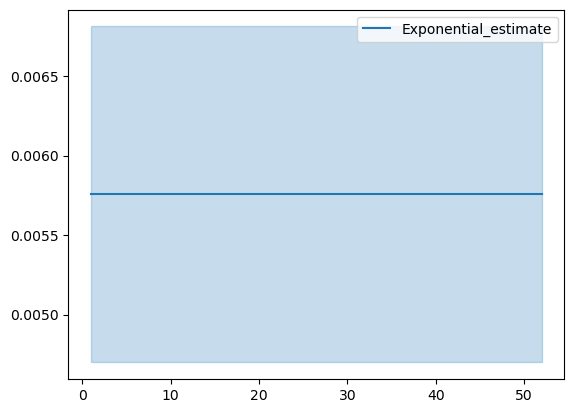

In [9]:
ex1.plot_hazard()

<AxesSubplot:>

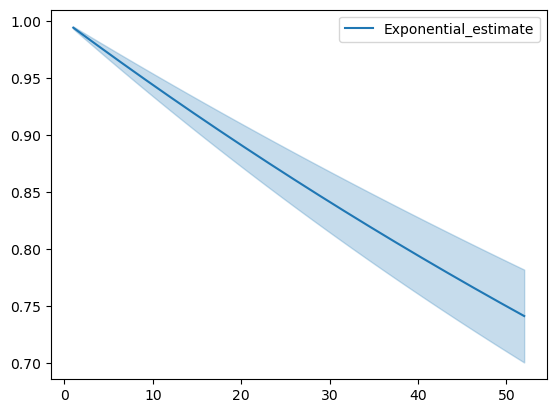

In [13]:
ex1.plot_survival_function()

<AxesSubplot:>

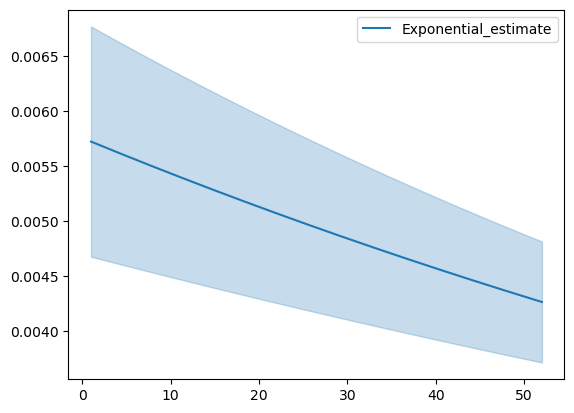

In [10]:
ex1.plot_density()

<AxesSubplot:>

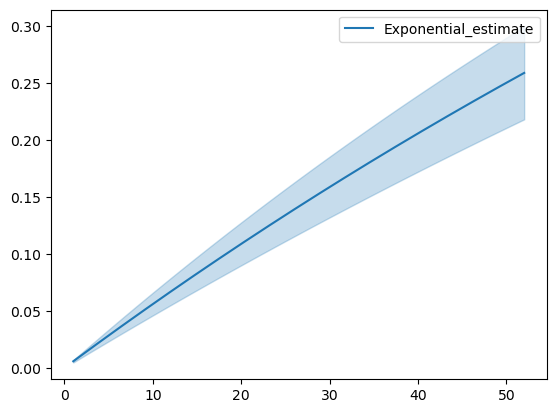

In [11]:
ex1.plot_cumulative_density()

In [14]:
ex1.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 432 total observations, 318 right-censored observations>
   number of observations = 432
number of events observed = 114
           log-likelihood = -701.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 173.76      16.27           141.87           205.66

          cmp to     z      p   -log2(p)
lambda_     0.00 10.68 <0.005      85.99
---
AIC = 1405.95

In [15]:
from lifelines import WeibullFitter

In [16]:
weib1 = WeibullFitter().fit(rossi['week'], rossi['arrest'])

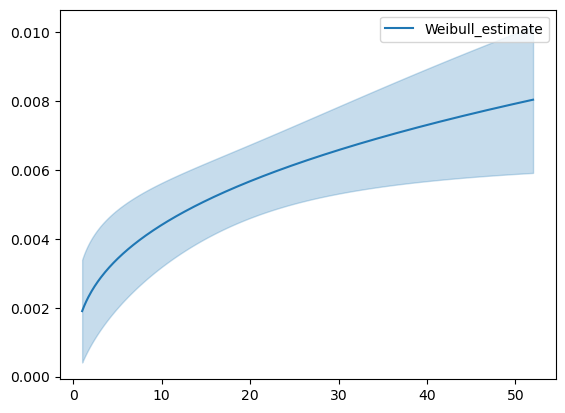

In [18]:
weib1.plot_hazard(); #funcion de riesgo
#conforme pase el tiempo hay mas oportunidad de que lo arresten

In [19]:
weib1.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 432 total observations, 318 right-censored observations>
   number of observations = 432
number of events observed = 114
           log-likelihood = -696.62
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 123.68      13.34            97.53           149.83
rho_      1.37       0.12             1.12             1.61

          cmp to    z      p   -log2(p)
lambda_     1.00 9.19 <0.005      64.53
rho_        1.00 2.96 <0.005       8.36
---
AIC = 1397.25

In [20]:
from lifelines import LogNormalFitter

In [21]:
logn1 = LogNormalFitter().fit(rossi['week'], rossi['arrest'])

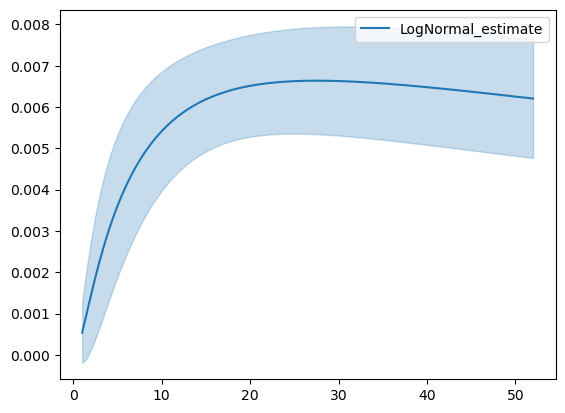

In [23]:
logn1.plot_hazard();

¿Cual de los tres modelos describe la funcion de probabilidad de mejor manera?


El criterio de informacion de Alaike (AIC) establece que el "mejor" modelo es el que tiene el menor valor en el AIC

$AIC = -2LogL + 2k$

donde $k$ es el número de parámetros a estimar

El AIC castiga modelos muy complejos (muchos parámetros)

In [28]:
print(f' exponencial: {ex1.AIC_.round(3)} , weibull: {weib1.AIC_.round(3)} , Lognormal: {logn1.AIC_.round(3)}')

 exponencial: 1405.954 , weibull: 1397.249 , Lognormal: 1399.821


De acuerdo con el criterio de Akaike (AIC) el mejor modelo, el que mejor captura el comportamiento de la funcion de probabilidad del tiempo de supervivencia de los arrestados es el modelo de Weibull donde el riesgo es creciente en el tiempo